In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
# Vectorize and put data columnwise
x_train_vectorized = x_train.reshape(60000,784).T

# Remove means
means = np.mean(x_train_vectorized, 1).reshape(784,1)
x_train_mr = x_train_vectorized - means

In [10]:
U,s,VT = np.linalg.svd(x_train_mr,full_matrices=False)

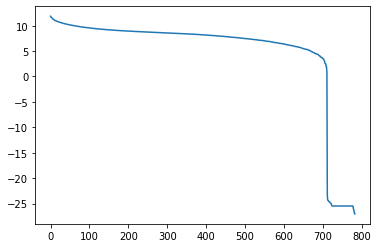

In [11]:
# If we take a quick look at s, there's a clear cut off where the singular values drop under 1
plt.plot(range(784), np.log(s))
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")

In [12]:
# Let's grab those first ones
s_red = [ i for i in s if i > 1]

# And get our new matrix
A  = U[:,:len(s_red)]@np.diag(s_red)@VT[:len(s_red),:]

# Add back means and make data rowwise again
A_lr = (A+means).T

In [13]:
## function to plot images in grid
#  Used in ECE: 601 HW as well 
def show_images(images, rows, cols):
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray_r)
        plt.xticks(())
        plt.yticks(())
    plt.show()

In [14]:
import time
from collections import Counter

def classifyKNN(x_train, x_test, k=1):
    neighbors = []

    start_time = time.time()
    for i_test in range(x_test.shape[0]):#range(100):
        min_vals = [10000000000000000]
        min_indexes = {10000000000000000 : -1}
        
        for j_train in range(x_train.shape[0]):

            
            if np.sum(np.square(x_test[i_test] - x_train[j_train])) < min_vals[-1]:
                
                val = np.sum(np.square(x_test[i_test] - x_train[j_train]))
                
                if val in min_indexes.keys():
                    continue
                
                if len(min_vals) < k:
                    min_vals.append(val)
                    min_indexes[val] = j_train
                else:
                    min_indexes.pop(min_vals[-1])
                    min_vals[-1] = val
                    min_indexes[val] = j_train

                min_vals = sorted(min_vals)

        classes = [y_train[i] for i in min_indexes.values()]
        # https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
        # Break ties more intelligently?
        neighbors.append(Counter(classes).most_common(1)[0][0])
        if i_test % 100 == 0:
            print(time.time()-start_time)
            start_time = time.time()
            
    return neighbors

In [154]:
test_lr = classifyKNN(A_lr, x_test.reshape(10000,784), 9)

1.047199010848999
78.26372575759888
75.4870855808258
79.68086814880371
76.55551409721375
75.4830961227417
74.96348667144775
75.56587624549866
76.10543036460876
77.02597093582153
78.42572045326233
88.24585700035095
89.28986740112305
93.742271900177
76.64299535751343
76.13634753227234
75.55693984031677
75.69848537445068
77.56654810905457
76.14929032325745
75.60676717758179
75.30286574363708
106.98456811904907
76.61854195594788
77.1207594871521
75.06521415710449
76.51531147956848
76.3228497505188
76.93321752548218
74.7011890411377
75.0802104473114
75.65859055519104
74.60132503509521
76.48773670196533
76.00793957710266
74.96747398376465
75.46700406074524
74.1400077342987
75.6945321559906
75.05057382583618
75.2098274230957
75.34094095230103
79.96673846244812
75.18694472312927
74.72515344619751
75.04744982719421
75.90995383262634
74.91564202308655
74.97443008422852
75.27884006500244
79.13831901550293
74.81987142562866
96.0046739578247
95.76508474349976
100.29990983009338
93.6715292930603
92.

In [155]:
errors = 0
for i in range(10000):
    if y_test[i] != test_lr[i]:
        errors += 1

print(errors/10000)

0.0338


In [ ]:
err_list = []
for k in [1,5,9,13,27]:
    print("-----------------------------------------------------")
    print("K")
    print(k)
    print("----------------------------------------------------")
    test_lr = classifyKNN(A_lr, x_test.reshape(10000,784), k)
    errors = 0
    for i in range(10000):
        if y_test[i] != test_lr[i]:
            errors += 1
    err_list.append(errors/10000)

-----------------------------------------------------
K
1
----------------------------------------------------
0.8387939929962158
85.74226713180542
87.47162628173828
80.86468076705933
81.54292893409729
84.53880143165588
78.4593939781189
82.45039820671082
87.16243243217468
78.98439621925354
80.30018448829651
78.93489933013916
79.66723775863647
76.60471749305725
76.96612572669983
77.84376001358032
82.98471665382385
85.98672747612
83.07408666610718
77.09446835517883
78.4713282585144
90.14207172393799
79.71199131011963
77.80095911026001
81.12457990646362
86.58564949035645
94.12123918533325
79.22140979766846
86.14365601539612
77.79839205741882
78.22474265098572
87.37238812446594
77.33791303634644
92.31278347969055
80.10667085647583
79.8223066329956
81.32427072525024
83.2483742237091
83.56556487083435
81.54603266716003
83.04789161682129
83.65834331512451
81.35140323638916
82.80506443977356
82.4474446773529
82.12405610084534
80.90554785728455
82.16619801521301
101.76738715171814
82.6175096035

In [ ]:
plt.plot([1,5,9,13,27], err_list)
plt.xlabel("k")
plt.ylabel("error rate")